In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from spyglass.utils.nwb_helper_fn import get_nwb_copy_filename
import datajoint as dj
import spyglass.common as sgc
import os
from copy import deepcopy
# os.chdir('/home/sambray/Documents/MS_analysis/')
# from ms_opto_stim_protocol import OptoStimProtocolParams, OptoStimProtocolSelection, OptoStimProtocol
os.chdir('/home/sambray/Documents/MS_analysis_samsplaying/')
from ms_opto_stim_protocol import (
    OptoStimProtocol,
    OptoStimProtocolSelection, 
    OptoStimProtocolParams,
    OptoStimProtocolTransfected, 
    OptoStimProtocolLaser,
    OptoStimProtocolClosedLoop
)
OptoStimProtocolParams().insert_default()
# OptoStimProtocolParams()
# len(OptoStimProtocolTransfected())
# len(OptoStimProtocol())#*OptoStimProtocolTransfected())
# OptoStimProtocolTransfected()
OptoStimProtocolClosedLoop()


nwb_file_name name of the NWB file,interval_list_name descriptive name of this interval list,targeted_phase targeted phase of theta (in degrees)
Banner20220224_.nwb,pos 0 valid times,90
Banner20220224_.nwb,pos 1 valid times,90
Banner20220224_.nwb,pos 2 valid times,90
Banner20220224_.nwb,pos 3 valid times,90
Banner20220224_.nwb,pos 4 valid times,90
Banner20220224_.nwb,pos 5 valid times,90
Banner20220224_.nwb,pos 6 valid times,90
Banner20220224_.nwb,pos 7 valid times,90
Banner20220225_.nwb,pos 0 valid times,90
Banner20220225_.nwb,pos 1 valid times,90


## Populate animal transfection states

In [2]:
from spyglass.common import Session


transfected_animals = ["Banner", "Totoro", "Winnie","Frodo"]
transfected_sessions = []
[transfected_sessions.extend((Session() & {"subject_id":animal}).fetch("nwb_file_name")) for animal in transfected_animals]
transfected_sessions

null_transfected_animals = ["Yoshi","Olive","Wallie","Bilbo"]
null_transfected_sessions = []
[null_transfected_sessions.extend((Session() & {"subject_id":animal}).fetch("nwb_file_name")) for animal in null_transfected_animals]
null_transfected_sessions

['Yoshi20220509_.nwb',
 'Yoshi20220510_.nwb',
 'Yoshi20220511_.nwb',
 'Yoshi20220513_.nwb',
 'Yoshi20220516_.nwb',
 'Yoshi20220517_.nwb',
 'Yoshi20220518_.nwb',
 'Olive20220627_.nwb',
 'Olive20220628_.nwb',
 'Olive20220629_.nwb',
 'Olive20220630_.nwb',
 'Olive20220701_.nwb',
 'Olive20220702_.nwb',
 'Olive20220705_.nwb',
 'Olive20220706_.nwb',
 'Olive20220707_.nwb',
 'Olive20220708_.nwb',
 'Olive20220711_.nwb',
 'Wallie20220911_.nwb',
 'Wallie20220912_.nwb',
 'Wallie20220913_.nwb',
 'Wallie20220914_.nwb',
 'Wallie20220915_.nwb',
 'Wallie20220916_.nwb',
 'Wallie20220922_.nwb',
 'Bilbo20230722_.nwb',
 'Bilbo20230724_.nwb',
 'Bilbo20230725_.nwb',
 'Bilbo20230726_.nwb',
 'Bilbo20230802_.nwb',
 'Bilbo20230804_.nwb']

In [55]:
sgc.Session() & {"nwb_file_name":"Winnie20220719_.nwb",}#nwb_file_name}
nwb_file_name

'Olive20220624_.nwb'

In [3]:
for nwb_file_name in transfected_sessions:
    OptoStimProtocolTransfected.insert1({"nwb_file_name":nwb_file_name,"transfected":True},skip_duplicates=True)
for nwb_file_name in null_transfected_sessions:
    OptoStimProtocolTransfected.insert1({"nwb_file_name":nwb_file_name,"transfected":False},skip_duplicates=True)    

## Populate Power Settings

In [4]:
power_settings = {
    #Banner
    "Banner20211221_.nwb":5.7,
    "Banner20211222_.nwb":5.7,
    "Banner20211227_.nwb":5.7,
    "Banner20211228_.nwb":25.7,
    "Banner20211230_.nwb":50,
    "Banner20211231_.nwb":50,
    "Banner20220103_.nwb":77,
    "Banner20220105_.nwb":77,
    "Banner20220123_.nwb":77,
    "Banner20220124_.nwb":77,
    "Banner20220126_.nwb":77,
    "Banner20220215_.nwb":77,
    "Banner20220216_.nwb":77,
    "Banner20220223_.nwb":77,
    "Banner20220224_.nwb":77,
    "Banner20220225_.nwb":77,
    #Danvers
    "Dan20211110_.nwb":5.7,
    "Dan20211111_.nwb":25.7,
    "Dan20211112_.nwb":5.7,
    "Dan20211113_.nwb":25.7,
    "Dan20211114_.nwb":50,
    #Odins
    "Odins20220107_.nwb":5.7,
    "Odins20220110_.nwb":25.7,
    "Odins20220111_.nwb":25.7,
    "Odins20220113_.nwb":50,
    "Odins20220118_.nwb":50,
    "Odins20220119_.nwb":77,
    "Odins20220123_.nwb":77,
    "Odins20220124_.nwb":77,
    "Odins20220126_.nwb":77,
    "Odins20220216_.nwb":77,
    #Olive
    "Olive20220624_.nwb":77,
    "Olive20220627_.nwb":77,
    "Olive20220628_.nwb":77,
    "Olive20220629_.nwb":77,
    "Olive20220630_.nwb":83,
    "Olive20220701_.nwb":83,
    "Olive20220702_.nwb":83,
    "Olive20220705_.nwb":77,
    "Olive20220706_.nwb":77,
    "Olive20220707_.nwb":77,
    "Olive20220708_.nwb":77,
    "Olive20220711_.nwb":77,
    #Totoro
    "Totoro20220524_.nwb":77,
    "Totoro20220525_.nwb":77,
    # "Totoro20220526_.nwb":-1,
    # "Totoro20220527_.nwb":77,
    "Totoro20220530_.nwb":77,
    "Totoro20220531_.nwb":77,
    "Totoro20220602_.nwb":77,
    "Totoro20220603_.nwb":77,
    "Totoro20220606_.nwb":77,
    "Totoro20220607_.nwb":77,
    "Totoro20220610_.nwb":77,
    "Totoro20220613_.nwb":77,
    "Totoro20220614_.nwb":77,
    "Totoro20220615_.nwb":77,   
    # "Totoro20220616_.nwb":-1,
    "Totoro20220617_.nwb":77,
    "Totoro20220621_.nwb":77,
    #Wallie
    "Wallie20220911_.nwb":77,
    "Wallie20220912_.nwb":77,
    "Wallie20220913_.nwb":77,
    "Wallie20220914_.nwb":77,
    "Wallie20220915_.nwb":77,
    "Wallie20220916_.nwb":77,
    "Wallie20220922_.nwb":77,
    #Winnie
    # "Winnie20220712_.nwb":-1,
    "Winnie20220713_.nwb":77,
    "Winnie20220714_.nwb":77,
    "Winnie20220715_.nwb":77,
    "Winnie20220716_.nwb":77,
    "Winnie20220717_.nwb":77,
    "Winnie20220718_.nwb":77,
    "Winnie20220719_.nwb":77,
    "Winnie20220720_.nwb":77,
    "Winnie20220722_.nwb":77,
    #Yoshi
    "Yoshi20220509_.nwb":77,
    "Yoshi20220510_.nwb":77,
    "Yoshi20220511_.nwb":77,
    "Yoshi20220513_.nwb":77,
    "Yoshi20220516_.nwb":77,
    "Yoshi20220517_.nwb":77,
    "Yoshi20220518_.nwb":77,
    "Yoshi20220519_.nwb":77,
    "Yoshi20220525_.nwb":77,
    # Frodo
    "Frodo20230808_.nwb":77,
    "Frodo20230809_.nwb":77,
    "Frodo20230810_.nwb":77,
    "Frodo20230811_.nwb":77,
    "Frodo20230814_.nwb":77,
    "Frodo20230815_.nwb":77,
    "Frodo20230816_.nwb":77,
    # Bilbo
    "Bilbo20230722_.nwb":77,
    "Bilbo20230724_.nwb":77,
    "Bilbo20230725_.nwb":77,
    "Bilbo20230726_.nwb":77,
    "Bilbo20230802_.nwb":77,
    "Bilbo20230804_.nwb":77,
}

OptoStimProtocolLaser()
for nwb_file_name, power in zip(power_settings.keys(),power_settings.values()):
    if len(sgc.Session() & {"nwb_file_name":nwb_file_name}) ==0:
        continue
    OptoStimProtocolLaser().insert1({"nwb_file_name":nwb_file_name,"laser_power":power},skip_duplicates=True)
    


In [9]:
OptoStimProtocolLaser()
# 'abs' contains 

nwb_file_name name of the NWB file,laser_power laser power in mW
Banner20211221_.nwb,5.7
Banner20211222_.nwb,5.7
Banner20211227_.nwb,5.7
Banner20211228_.nwb,25.7
Banner20211230_.nwb,50.0
Banner20211231_.nwb,50.0
Banner20220103_.nwb,77.0
Banner20220105_.nwb,77.0
Banner20220123_.nwb,77.0
Banner20220124_.nwb,77.0


## Populate non-inferable closed-loop settings

In [4]:
closed_settings = [
    #(nwb_file_name, epoch#, theta_angle)
    
    # #Banner
    ("Banner20220215_.nwb","pos 0 valid times",90),
   ("Banner20220215_.nwb","pos 1 valid times",180),
   ("Banner20220215_.nwb","pos 2 valid times",270),
   ("Banner20220215_.nwb","pos 3 valid times",360),
   
   ("Banner20220216_.nwb","pos 0 valid times",90),
   ("Banner20220216_.nwb","pos 1 valid times",180),
   ("Banner20220216_.nwb","pos 2 valid times",270),
   ("Banner20220216_.nwb","pos 3 valid times",360),
    
    
    
    ("Banner20220224_.nwb",2,90),
    ("Banner20220224_.nwb",4,90),
    ("Banner20220224_.nwb",6,90),
    ("Banner20220224_.nwb",8,90),
    ("Banner20220224_.nwb",10,90),
    ("Banner20220224_.nwb",12,90),
    ("Banner20220224_.nwb",14,90),
    ("Banner20220224_.nwb",16,90),
    ("Banner20220225_.nwb",2,90),
    ("Banner20220225_.nwb",4,90),
    ("Banner20220225_.nwb",6,90),
    ("Banner20220225_.nwb",8,90),
    ("Banner20220225_.nwb",10,90),
    ("Banner20220225_.nwb",12,90),
    ("Banner20220225_.nwb",14,90),
    ("Banner20220225_.nwb",16,90),
    # #Danvers
    # "Danvers20211110_.nwb":5.7,
    # "Danvers20211111_.nwb":25.7,
    # "Danvers20211112_.nwb":5.7,
    # "Danvers20211113_.nwb":25.7,
    # "Danvers20211114_.nwb":50,
    # #Odins
    # ("Odins20220126_.nwb",
    # #Olive
    ("Olive20220707_.nwb",4,90),
    ("Olive20220707_.nwb",6,180),
    ("Olive20220707_.nwb",8,270),
    ("Olive20220707_.nwb",10,360),
    ("Olive20220707_.nwb",12,90),
    ("Olive20220707_.nwb",14,180),
    ("Olive20220707_.nwb",16,270),
    ("Olive20220707_.nwb",18,360),
    ("Olive20220708_.nwb",4,90),
    ("Olive20220708_.nwb",6,180),
    ("Olive20220708_.nwb",8,270),
    ("Olive20220708_.nwb",10,360),
    ("Olive20220708_.nwb",12,90),
    ("Olive20220708_.nwb",14,180),
    ("Olive20220708_.nwb",16,270),
    ("Olive20220708_.nwb",18,360),
    ("Olive20220711_.nwb",2,90),
    ("Olive20220711_.nwb",4,90),
    ("Olive20220711_.nwb",6,90),
    ("Olive20220711_.nwb",8,90),
    ("Olive20220711_.nwb",10,90),
    ("Olive20220711_.nwb",12,90),
    ("Olive20220711_.nwb",14,90),
    ("Olive20220711_.nwb",16,90),
    ("Olive20220711_.nwb",18,90),
    # #Totoro
    ("Totoro20220607_.nwb",4,90),
    ("Totoro20220607_.nwb",6,180),
    ("Totoro20220607_.nwb",8,270),
    ("Totoro20220607_.nwb",10,360),
    ("Totoro20220607_.nwb",12,90),
    ("Totoro20220607_.nwb",14,180),
    ("Totoro20220607_.nwb",16,270),
    ("Totoro20220607_.nwb",18,360),
    ("Totoro20220610_.nwb",4,90),
    ("Totoro20220610_.nwb",6,180),
    ("Totoro20220610_.nwb",8,270),
    ("Totoro20220610_.nwb",10,360),
    ("Totoro20220610_.nwb",12,90),
    ("Totoro20220610_.nwb",14,180),
    ("Totoro20220610_.nwb",16,270),
    ("Totoro20220610_.nwb",18,360),
    ("Totoro20220613_.nwb",2,90),
    ("Totoro20220613_.nwb",4,90),
    ("Totoro20220614_.nwb",2,90),
    ("Totoro20220614_.nwb",4,90),
    ("Totoro20220614_.nwb",6,90),
    ("Totoro20220614_.nwb",8,90),
    ("Totoro20220614_.nwb",10,90),
    ("Totoro20220614_.nwb",12,90),
    ("Totoro20220614_.nwb",14,90),
    ("Totoro20220614_.nwb",16,90),
    ("Totoro20220616_.nwb",2,90),
    ("Totoro20220616_.nwb",4,90),
    ("Totoro20220616_.nwb",6,90),
    ("Totoro20220616_.nwb",8,90),
    ("Totoro20220616_.nwb",10,90),
    ("Totoro20220616_.nwb",12,90),
    ("Totoro20220616_.nwb",14,90),
    ("Totoro20220616_.nwb",16,90),
    # #Wallie
    ("Wallie20220914_.nwb",4,90),
    ("Wallie20220914_.nwb",6,180),
    ("Wallie20220914_.nwb",8,270),
    ("Wallie20220914_.nwb",10,360),
    ("Wallie20220914_.nwb",12,90),
    ("Wallie20220914_.nwb",14,180),
    ("Wallie20220914_.nwb",16,270),
    ("Wallie20220914_.nwb",18,360),
    ("Wallie20220915_.nwb",4,90),
    ("Wallie20220915_.nwb",6,180),
    ("Wallie20220915_.nwb",8,270),
    ("Wallie20220915_.nwb",10,360),
    ("Wallie20220915_.nwb",12,90),
    ("Wallie20220915_.nwb",14,180),
    ("Wallie20220915_.nwb",16,270),
    ("Wallie20220915_.nwb",18,360),
    ("Wallie20220922_.nwb",2,90),
    ("Wallie20220922_.nwb",4,90),
    ("Wallie20220922_.nwb",6,90),
    ("Wallie20220922_.nwb",8,90),
    ("Wallie20220922_.nwb",10,90),
    ("Wallie20220922_.nwb",12,90),
    ("Wallie20220922_.nwb",14,90),
    ("Wallie20220922_.nwb",16,90),
    ("Wallie20220922_.nwb",18,90),
    ("Wallie20220922_.nwb",20,90),
    # #Winnie
    ("Winnie20220717_.nwb",4,90),
    ("Winnie20220717_.nwb",6,180),
    ("Winnie20220717_.nwb",8,270),
    ("Winnie20220717_.nwb",10,360),
    ("Winnie20220717_.nwb",12,90),
    ("Winnie20220717_.nwb",14,180),
    ("Winnie20220717_.nwb",16,270),
    ("Winnie20220717_.nwb",18,360),
    ("Winnie20220718_.nwb",4,90),
    ("Winnie20220718_.nwb",6,180),
    ("Winnie20220718_.nwb",8,270),
    ("Winnie20220718_.nwb",10,360),
    ("Winnie20220718_.nwb",12,90),
    ("Winnie20220718_.nwb",14,180),
    ("Winnie20220718_.nwb",16,270),
    ("Winnie20220718_.nwb",18,360),
    ("Winnie20220719_.nwb",2,90),
    ("Winnie20220719_.nwb",4,90),
    ("Winnie20220719_.nwb",6,90),
    ("Winnie20220719_.nwb",8,90),
    ("Winnie20220719_.nwb",10,90),
    ("Winnie20220719_.nwb",12,90),
    ("Winnie20220719_.nwb",14,90),
    ("Winnie20220719_.nwb",16,90),
    ("Winnie20220719_.nwb",18,90),
    ("Winnie20220720_.nwb",2,90),
    ("Winnie20220720_.nwb",4,90),
    ("Winnie20220720_.nwb",6,90),
    ("Winnie20220720_.nwb",8,90),
    ("Winnie20220720_.nwb",10,90),
    ("Winnie20220720_.nwb",12,90),
    ("Winnie20220720_.nwb",14,90),
    ("Winnie20220720_.nwb",16,90),
    ("Winnie20220722_.nwb",2,90),
    ("Winnie20220722_.nwb",4,90),
    #Yoshi
    ("Yoshi20220513_.nwb",4,90),
    ("Yoshi20220513_.nwb",6,180),
    ("Yoshi20220513_.nwb",8,270),
    ("Yoshi20220513_.nwb",10,360),
    ("Yoshi20220513_.nwb",12,90),
    ("Yoshi20220513_.nwb",14,180),
    ("Yoshi20220513_.nwb",16,270),
    ("Yoshi20220513_.nwb",18,360),
    ("Yoshi20220516_.nwb",4,90),
    ("Yoshi20220516_.nwb",6,180),
    ("Yoshi20220516_.nwb",8,270),
    ("Yoshi20220516_.nwb",10,360),
    ("Yoshi20220516_.nwb",12,90),
    ("Yoshi20220516_.nwb",14,180),
    ("Yoshi20220516_.nwb",16,270),
    ("Yoshi20220516_.nwb",18,360),
    ("Yoshi20220517_.nwb",2,90),
    ("Yoshi20220517_.nwb",4,90),
    ("Yoshi20220517_.nwb",6,90),
    ("Yoshi20220517_.nwb",8,90),
    ("Yoshi20220517_.nwb",10,90),
    ("Yoshi20220517_.nwb",12,90),
    ("Yoshi20220517_.nwb",14,90),
    ("Yoshi20220517_.nwb",16,90),
    ("Yoshi20220518_.nwb",2,90),
    ("Yoshi20220518_.nwb",4,90),
    ("Yoshi20220518_.nwb",6,90),
    ("Yoshi20220518_.nwb",8,90),
    ("Yoshi20220518_.nwb",10,90),
    ("Yoshi20220518_.nwb",12,90),
    ("Yoshi20220518_.nwb",14,90),
    ("Yoshi20220518_.nwb",16,90),
    #Frodo
    ("Frodo20230810_.nwb",12,90),
    ("Frodo20230810_.nwb",14,180),
    ("Frodo20230810_.nwb",16,270),
    ("Frodo20230810_.nwb",18,360),
    #
    ("Frodo20230811_.nwb",4,90),
    ("Frodo20230811_.nwb",6,90),
    ("Frodo20230811_.nwb",8,180),
    ("Frodo20230811_.nwb",10,180),
    ("Frodo20230811_.nwb",12,270),
    ("Frodo20230811_.nwb",14,270),
    ("Frodo20230811_.nwb",16,360),
    ("Frodo20230811_.nwb",18,360),
    #
    ("Frodo20230814_.nwb",2,90),
    ("Frodo20230814_.nwb",4,90),
    ("Frodo20230814_.nwb",6,90),
    ("Frodo20230814_.nwb",8,90),
    ("Frodo20230814_.nwb",10,90),
    ("Frodo20230814_.nwb",12,90),
    ("Frodo20230814_.nwb",14,90),
    ("Frodo20230814_.nwb",16,90),
    ("Frodo20230814_.nwb",18,90),
    #
    ("Frodo20230815_.nwb",2,90),
    ("Frodo20230815_.nwb",4,90),
    ("Frodo20230815_.nwb",6,90),
    ("Frodo20230815_.nwb",8,90),
    #
    ("Frodo20230816_.nwb",2,90),
    ("Frodo20230816_.nwb",4,90),
    #Bilbo
    ("Bilbo20230725_.nwb",6,90),
    ("Bilbo20230725_.nwb",8,180),
    ("Bilbo20230725_.nwb",10,270),
    ("Bilbo20230725_.nwb",12,360),
    #
    ("Bilbo20230726_.nwb",2,90),
    #
    ("Bilbo20230802_.nwb",2,90),
    ("Bilbo20230802_.nwb",4,90),
    ("Bilbo20230802_.nwb",6,90),
    ("Bilbo20230802_.nwb",8,90),
    ("Bilbo20230802_.nwb",10,90),
    ("Bilbo20230802_.nwb",12,90),
    ("Bilbo20230802_.nwb",14,90),
    ("Bilbo20230802_.nwb",16,90),
    #
    ("Bilbo20230804_.nwb",2,90),
    ("Bilbo20230804_.nwb",4,90),
]

from spyglass.common import Session, TaskEpoch, PositionIntervalMap
os.chdir("/home/sambray/Documents/MS_analysis_Jen/")
from ms_interval import EpochIntervalListName

for nwb_file_name, epoch, theta in closed_settings:

    #get interval name
    key = {"nwb_file_name": nwb_file_name}
    if type(epoch) == str:
        interval_list_name = epoch
    else:
        key.update({"epoch": epoch})
        # if len((EpochIntervalListName() & key).fetch("interval_list_name"))==0: 
        #     print('SKIPPED',key)
        #     continue
        # interval_list_name = (EpochIntervalListName() & key).fetch1("interval_list_name")
        if not (TaskEpoch * PositionIntervalMap) & key:
            print('SKIPPED',key)
            continue
        interval_list_name = ((TaskEpoch * PositionIntervalMap) & key).fetch1('position_interval_name')
        # print(interval_list_name)

    OptoStimProtocolClosedLoop().insert1({"nwb_file_name":nwb_file_name,
                                          "interval_list_name":interval_list_name,
                                          "targeted_phase":theta,
                                         }, skip_duplicates=True)
    # if 'Frodo' in nwb_file_name:
    #     print('Frodo')
    #     break



SKIPPED {'nwb_file_name': 'Olive20220711_.nwb', 'epoch': 18}
SKIPPED {'nwb_file_name': 'Wallie20220914_.nwb', 'epoch': 4}
SKIPPED {'nwb_file_name': 'Wallie20220914_.nwb', 'epoch': 6}
SKIPPED {'nwb_file_name': 'Wallie20220914_.nwb', 'epoch': 8}
SKIPPED {'nwb_file_name': 'Wallie20220914_.nwb', 'epoch': 10}
SKIPPED {'nwb_file_name': 'Wallie20220914_.nwb', 'epoch': 12}
SKIPPED {'nwb_file_name': 'Wallie20220914_.nwb', 'epoch': 14}
SKIPPED {'nwb_file_name': 'Wallie20220914_.nwb', 'epoch': 16}
SKIPPED {'nwb_file_name': 'Wallie20220914_.nwb', 'epoch': 18}
SKIPPED {'nwb_file_name': 'Frodo20230811_.nwb', 'epoch': 6}
SKIPPED {'nwb_file_name': 'Frodo20230815_.nwb', 'epoch': 6}
SKIPPED {'nwb_file_name': 'Frodo20230815_.nwb', 'epoch': 8}


In [12]:
os.chdir("/home/sambray/Documents/MS_analysis_Jen/")
from ms_interval import EpochIntervalListName
EpochIntervalListName() #& {'nwb_file_name': 'Frodo20230815_.nwb',}# 'epoch': 6}

nwb_file_name name of the NWB file,epoch the session epoch for this task and apparatus(1 based),interval_list_name descriptive name of this interval list
Banner20211221_.nwb,2,pos 0 valid times
Banner20211221_.nwb,4,pos 1 valid times
Banner20211222_.nwb,2,pos 0 valid times
Banner20211222_.nwb,4,pos 1 valid times
Banner20211222_.nwb,6,pos 2 valid times
Banner20211222_.nwb,8,pos 3 valid times
Banner20211222_.nwb,10,pos 4 valid times
Banner20211227_.nwb,2,pos 0 valid times
Banner20211227_.nwb,4,pos 1 valid times
Banner20211227_.nwb,6,pos 2 valid times


In [16]:
from spyglass.common import Session, TaskEpoch, PositionIntervalMap
key = {'nwb_file_name': 'Bilbo2023080725_.nwb',}
(TaskEpoch * PositionIntervalMap) & key# 'epoch': 4}
Session & key


nwb_file_name name of the NWB file,subject_id,institution_name,lab_name,session_id,session_description,session_start_time,timestamps_reference_time,experiment_description


In [31]:
interval_list_name
from spyglass.common import IntervalList
IntervalList()&insert_key   
EpochIntervalListName() & {'nwb_file_name':nwb_file_name}

nwb_file_name name of the NWB file,epoch the session epoch for this task and apparatus(1 based),interval_list_name descriptive name of this interval list


In [25]:
key
insert_key ={"nwb_file_name":nwb_file_name,
                                          "interval_list_name":interval_list_name,
                                          "targeted_phase":theta,
                                         }
OptoStimProtocolClosedLoop.insert1(insert_key,skip_duplicates=True)

IntegrityError: Cannot add or update a child row: a foreign key constraint fails (`ms_opto_stim_protocol`.`opto_stim_protocol_closed_loop`, CONSTRAINT `opto_stim_protocol_closed_loop_ibfk_1` FOREIGN KEY (`nwb_file_name`, `interval_list_name`) REFERENCES `common_interval`.`i)

In [33]:
OptoStimProtocolClosedLoop() & key#{"nwb_file_name":"Frodo20230811_.nwb"}

nwb_file_name name of the NWB file,interval_list_name descriptive name of this interval list,targeted_phase targeted phase of theta (in degrees)


## Define Experiment Sets

In [6]:
inference_parameters = 'default_pulse_train'
nwb_file_names = [
    #Olive
    "Olive20220624_.nwb",
    "Olive20220627_.nwb",
    "Olive20220628_.nwb",
    "Olive20220629_.nwb",
    "Olive20220630_.nwb",
    "Olive20220701_.nwb",
    "Olive20220702_.nwb",
    "Olive20220705_.nwb",
    "Olive20220706_.nwb",
    #Yoshi
    "Yoshi20220509_.nwb",
    "Yoshi20220510_.nwb",
    "Yoshi20220511_.nwb",
    "Yoshi20220519_.nwb",
    "Yoshi20220525_.nwb",
    #Winnie
    "Winnie20220712_.nwb",
    "Winnie20220713_.nwb",
    "Winnie20220714_.nwb",
    "Winnie20220715_.nwb",
    "Winnie20220716_.nwb",
    #Wallie
    "Wallie20220911_.nwb",
    "Wallie20220912_.nwb",
    "Wallie20220913_.nwb",
    "Wallie20220916_.nwb",
    #Totoro
    "Totoro20220524_.nwb",
    "Totoro20220525_.nwb",
    "Totoro20220526_.nwb",
    "Totoro20220527_.nwb",
    "Totoro20220530_.nwb",
    "Totoro20220531_.nwb",
    "Totoro20220602_.nwb",
    "Totoro20220603_.nwb",
    "Totoro20220606_.nwb",
    "Totoro20220621_.nwb",
    #Odins
    "Odins20220107_.nwb",
    "Odins20220110_.nwb",
    "Odins20220111_.nwb",
    "Odins20220113_.nwb",
    "Odins20220118_.nwb",
    "Odins20220119_.nwb",
    "Odins20220123_.nwb",
    "Odins20220124_.nwb",
    # "Odins20220126_.nwb", ???
    #Banner
    "Banner20211221_.nwb",
    "Banner20211222_.nwb",
    "Banner20211227_.nwb",
    "Banner20211228_.nwb",
    "Banner20211230_.nwb",
    "Banner20211231_.nwb",
    "Banner20220103_.nwb",
    "Banner20220105_.nwb",
    "Banner20220123_.nwb",
    "Banner20220124_.nwb",
    "Banner20220126_.nwb",
    #Dan
    "Dan20211112_.nwb",
    "Dan20211113_.nwb",
    "Dan20211114_.nwb",
    #Frodo
    "Frodo20230808_.nwb",
    "Frodo20230809_.nwb",
    "Frodo20230810_.nwb", #epochs 4,6,8,10 only #catch the closed loop ones based on presence in OptoStimProtocolClosedLoop
    #Bilbo
    "Bilbo20230724_.nwb",
    "Bilbo20230725_.nwb",
    "Bilbo20230726_.nwb", #has mied
]

# inference_parameters = 'default_phase_targeting'
# nwb_file_names = [
#     #Olive
#     "Olive20220707_.nwb",
#     "Olive20220708_.nwb",
#     "Olive20220711_.nwb",
#     #Yoshi
#     "Yoshi20220513_.nwb",
#     "Yoshi20220516_.nwb",
#     "Yoshi20220517_.nwb",
#     "Yoshi20220518_.nwb",
#     #Winnie
#     "Winnie20220717_.nwb",
#     "Winnie20220718_.nwb",
#     "Winnie20220719_.nwb",
#     "Winnie20220720_.nwb",
#     "Winnie20220722_.nwb",
#     #Wallie
#     "Wallie20220914_.nwb",
#     "Wallie20220915_.nwb",
#     "Wallie20220922_.nwb",
#     #Totoro
#     "Totoro20220607_.nwb",
#     "Totoro20220610_.nwb",
#     "Totoro20220613_.nwb",
#     "Totoro20220614_.nwb",
#     "Totoro20220615_.nwb",
#     "Totoro20220616_.nwb",
#     "Totoro20220617_.nwb",
#     #Odins
#     "Odins20220126_.nwb",
#     "Odins20220216_.nwb",
#     #Banner
#     "Banner20220215_.nwb",
#     "Banner20220216_.nwb",
#     "Banner20220223_.nwb",
#     "Banner20220224_.nwb",
#     "Banner20220225_.nwb",
#     #Frodo
#     # "Frodo20230810_.nwb", #epochs 12,14,16,18 only
#     "Frodo20230811_.nwb",
#     "Frodo20230814_.nwb",
#     "Frodo20230815_.nwb",
#     "Frodo20230816_.nwb",
#     #Bilbo
#     "Bilbo20230802_.nwb",
#     "Bilbo20230804_.nwb",
# ]
    
# np.isnan(np.mean([]))

## Populate experimental set parameters

In [7]:
#populate parameters for a whole list of files and epochs
# nwb_file_names = ["Banner20220224_.nwb",
#     "Banner20220225_.nwb",]
nwb_file_names = ["Winnie20220714_.nwb"]
for nwb_file_name in nwb_file_names:
    if not '_' in nwb_file_name:
        nwb_copy_file_name = get_nwb_copy_filename(nwb_file_name)
    else:
        nwb_copy_file_name = deepcopy(nwb_file_name)
    OptoStimProtocolSelection()
    
    # build the key
    start_key = {'nwb_file_name': nwb_copy_file_name,'dio_event_name':'stim', 'opto_infer_params_name':inference_parameters,}
    key = {'nwb_file_name': nwb_copy_file_name,'dio_event_name':'stim', 'opto_infer_params_name':inference_parameters,'interval_list_name':'None'}
    for interval_name in (sgc.IntervalList()& start_key).fetch('interval_list_name'): #["pos 7 valid times"]:#
        if ('pos' == interval_name[:3]) and ("valid times" == interval_name[-11:]):
        # print(interval_name)
            key.update({'interval_list_name':interval_name})
            # catch mixed experiment sessions. Make sure you populate the closed loop parameters first
            if len(OptoStimProtocolClosedLoop() & key)>0:
                key_temp = deepcopy(key)
                key_temp['opto_infer_params_name'] = 'default_phase_targeting'    
                OptoStimProtocolSelection().insert1(key_temp,skip_duplicates=True)
                OptoStimProtocol.populate(key_temp)
            #regular case
            else:
                OptoStimProtocolSelection().insert1(key,skip_duplicates=True)
                OptoStimProtocol.populate(key)
        # print((OptoStimProtocol() & key).fetch1('inferred_params'))



[2023-10-26 15:21:45,908][WARNING]: Skipped checksum for file with hash: 72a61dc6-65af-acbb-56a4-80758ca9dbc0, and path: /stelmo/nwb/raw/Winnie20220714_.nwb


Computing optogenetic protocols for: {'nwb_file_name': 'Winnie20220714_.nwb', 'interval_list_name': 'pos 0 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_pulse_train'}


[2023-10-26 15:21:46,598][WARNING]: Skipped checksum for file with hash: 72a61dc6-65af-acbb-56a4-80758ca9dbc0, and path: /stelmo/nwb/raw/Winnie20220714_.nwb
[2023-10-26 15:21:46,663][WARNING]: Skipped checksum for file with hash: 72a61dc6-65af-acbb-56a4-80758ca9dbc0, and path: /stelmo/nwb/raw/Winnie20220714_.nwb
[2023-10-26 15:21:46,721][WARNING]: Skipped checksum for file with hash: 72a61dc6-65af-acbb-56a4-80758ca9dbc0, and path: /stelmo/nwb/raw/Winnie20220714_.nwb
[2023-10-26 15:21:46,783][WARNING]: Skipped checksum for file with hash: 72a61dc6-65af-acbb-56a4-80758ca9dbc0, and path: /stelmo/nwb/raw/Winnie20220714_.nwb


Computing optogenetic protocols for: {'nwb_file_name': 'Winnie20220714_.nwb', 'interval_list_name': 'pos 1 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_pulse_train'}
Computing optogenetic protocols for: {'nwb_file_name': 'Winnie20220714_.nwb', 'interval_list_name': 'pos 10 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_pulse_train'}
Computing optogenetic protocols for: {'nwb_file_name': 'Winnie20220714_.nwb', 'interval_list_name': 'pos 11 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_pulse_train'}
INTRATRAINS:  0
[  0  39  53  69 142 161 227 246 267 281 317 338 355 373 399 414 436 459
 477 495 520 532 550 559 561 586 598 614 629 643 657 669 682 704 719 736
 751 777]
TYPE: <class 'float'> 21.0
Computing optogenetic protocols for: {'nwb_file_name': 'Winnie20220714_.nwb', 'interval_list_name': 'pos 12 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_pulse_train'}


[2023-10-26 15:21:46,844][WARNING]: Skipped checksum for file with hash: 72a61dc6-65af-acbb-56a4-80758ca9dbc0, and path: /stelmo/nwb/raw/Winnie20220714_.nwb
[2023-10-26 15:21:46,897][WARNING]: Skipped checksum for file with hash: 72a61dc6-65af-acbb-56a4-80758ca9dbc0, and path: /stelmo/nwb/raw/Winnie20220714_.nwb
[2023-10-26 15:21:46,937][WARNING]: Skipped checksum for file with hash: 72a61dc6-65af-acbb-56a4-80758ca9dbc0, and path: /stelmo/nwb/raw/Winnie20220714_.nwb
[2023-10-26 15:21:46,976][WARNING]: Skipped checksum for file with hash: 72a61dc6-65af-acbb-56a4-80758ca9dbc0, and path: /stelmo/nwb/raw/Winnie20220714_.nwb
[2023-10-26 15:21:47,018][WARNING]: Skipped checksum for file with hash: 72a61dc6-65af-acbb-56a4-80758ca9dbc0, and path: /stelmo/nwb/raw/Winnie20220714_.nwb


Computing optogenetic protocols for: {'nwb_file_name': 'Winnie20220714_.nwb', 'interval_list_name': 'pos 13 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_pulse_train'}
INTRATRAINS:  31
[  0  11  20  46  53  69  78 136 154 207 214 240 258 269 280 337 450 457
 469 497 509 535 547 563]
TYPE: <class 'float'> 24.47826086956522
Computing optogenetic protocols for: {'nwb_file_name': 'Winnie20220714_.nwb', 'interval_list_name': 'pos 14 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_pulse_train'}
Computing optogenetic protocols for: {'nwb_file_name': 'Winnie20220714_.nwb', 'interval_list_name': 'pos 2 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_pulse_train'}
Computing optogenetic protocols for: {'nwb_file_name': 'Winnie20220714_.nwb', 'interval_list_name': 'pos 3 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_pulse_train'}
INTRATRAINS:  0
[   0  100  177  228  283  332  373  412  

[2023-10-26 15:21:47,059][WARNING]: Skipped checksum for file with hash: 72a61dc6-65af-acbb-56a4-80758ca9dbc0, and path: /stelmo/nwb/raw/Winnie20220714_.nwb
[2023-10-26 15:21:47,106][WARNING]: Skipped checksum for file with hash: 72a61dc6-65af-acbb-56a4-80758ca9dbc0, and path: /stelmo/nwb/raw/Winnie20220714_.nwb
[2023-10-26 15:21:47,148][WARNING]: Skipped checksum for file with hash: 72a61dc6-65af-acbb-56a4-80758ca9dbc0, and path: /stelmo/nwb/raw/Winnie20220714_.nwb
[2023-10-26 15:21:47,191][WARNING]: Skipped checksum for file with hash: 72a61dc6-65af-acbb-56a4-80758ca9dbc0, and path: /stelmo/nwb/raw/Winnie20220714_.nwb
[2023-10-26 15:21:47,234][WARNING]: Skipped checksum for file with hash: 72a61dc6-65af-acbb-56a4-80758ca9dbc0, and path: /stelmo/nwb/raw/Winnie20220714_.nwb


Computing optogenetic protocols for: {'nwb_file_name': 'Winnie20220714_.nwb', 'interval_list_name': 'pos 5 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_pulse_train'}
INTRATRAINS:  0
[   0   37   60   94  115  151  189  220  244  308  337  366  395  437
  530  566  601  629  660  738  775  803  831  875  924  955  998 1027
 1064 1099 1135 1174 1208 1254 1261 1311 1337 1368 1397 1425 1485 1522]
TYPE: <class 'float'> 37.1219512195122
Computing optogenetic protocols for: {'nwb_file_name': 'Winnie20220714_.nwb', 'interval_list_name': 'pos 6 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_pulse_train'}
Computing optogenetic protocols for: {'nwb_file_name': 'Winnie20220714_.nwb', 'interval_list_name': 'pos 7 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_pulse_train'}
INTRATRAINS:  0
[   0   28   66  102  125  145  170  270  304  348  369  421  481  509
  548  574  598  643  671  696  721  744  773  780  805 

In [20]:
# Look at what's in there
OptoStimProtocol & {'nwb_file_name':'Winnie20220713_.nwb'}
name = None
for key in ((OptoStimProtocol*Session)&{'subject_id':'Winnie'}).fetch('KEY'):
    # print(key)
    if not key['nwb_file_name']==name:
        print(key['nwb_file_name'])
        name = key['nwb_file_name']
    info = []
    info.append(key['nwb_file_name'])
    info.append(key['interval_list_name'])
    info.append((OptoStimProtocol&key).fetch1('optogenetic_protocol'))
    info.append((OptoStimProtocol&key).fetch1('period_ms'))
    # info.append(key['period_ms'])
    print(info)
    # break
    

Winnie20220712_.nwb
['Winnie20220712_.nwb', 'pos 0 valid times', 'None', -1]
['Winnie20220712_.nwb', 'pos 1 valid times', 'None', -1]
['Winnie20220712_.nwb', 'pos 2 valid times', 'None', -1]
['Winnie20220712_.nwb', 'pos 3 valid times', 'None', -1]
['Winnie20220712_.nwb', 'pos 4 valid times', 'None', -1]
Winnie20220713_.nwb
['Winnie20220713_.nwb', 'pos 0 valid times', 'None', -1]
['Winnie20220713_.nwb', 'pos 1 valid times', 'None', -1]
['Winnie20220713_.nwb', 'pos 10 valid times', 'None', -1]
['Winnie20220713_.nwb', 'pos 11 valid times', 'pulse_train', 80]
['Winnie20220713_.nwb', 'pos 12 valid times', 'None', -1]
['Winnie20220713_.nwb', 'pos 13 valid times', 'pulse_train', 50]
['Winnie20220713_.nwb', 'pos 14 valid times', 'None', -1]
['Winnie20220713_.nwb', 'pos 2 valid times', 'None', -1]
['Winnie20220713_.nwb', 'pos 3 valid times', 'pulse_train', 250]
['Winnie20220713_.nwb', 'pos 4 valid times', 'None', -1]
['Winnie20220713_.nwb', 'pos 5 valid times', 'pulse_train', 165]
['Winnie20220

In [16]:
from spyglass.common import Session

key = {'nwb_file_name':"Bilbo20230802_.nwb"}
OptoStimProtocol() & key
# Session() & key
# OptoStimProtocolLaser & {'nwb_file_name':'Frodo20230808_.nwb'}

nwb_file_name name of the NWB file,interval_list_name descriptive name of this interval list,dio_event_name the name assigned to this DIO event,opto_infer_params_name name for this set of parameters,optogenetic_protocol name of optogenetic protocol type (e.g. pulse train),pulse_length_ms length of individual pulse,inter_pulse_interval_ms time between pulses in a train (= np.nan if pulses_per_train=1 or phase-targeting feedback),inter_train_interval_ms time between end of train and start of new one (= np.nan if phase-targeting feedback),period_ms time between successive train starts (= np.nan if phase-targeting feedback),pulses_per_train number of pulses in a train,number_trains mean number of train events observed between behavior-off intervals,stim_on whether any optogenetic stimulus occured in this interval,test_intervals numpy array with start and end times for each interval optogenetics is running,control_intervals numpy array with start and end times for each interval optogenetics is off
Bilbo20230802_.nwb,pos 0 valid times,stim,default_phase_targeting,None,-1,-1,-1,-1,-1,-1.0,0,=BLOB=,=BLOB=
Bilbo20230802_.nwb,pos 1 valid times,stim,default_phase_targeting,phase_targeting,40,82,-1,-1,-1,-1.0,1,=BLOB=,=BLOB=
Bilbo20230802_.nwb,pos 10 valid times,stim,default_phase_targeting,None,-1,-1,-1,-1,-1,-1.0,0,=BLOB=,=BLOB=
Bilbo20230802_.nwb,pos 11 valid times,stim,default_phase_targeting,phase_targeting,40,71,-1,-1,-1,-1.0,1,=BLOB=,=BLOB=
Bilbo20230802_.nwb,pos 12 valid times,stim,default_phase_targeting,None,-1,-1,-1,-1,-1,-1.0,0,=BLOB=,=BLOB=
Bilbo20230802_.nwb,pos 13 valid times,stim,default_phase_targeting,phase_targeting,40,69,-1,-1,-1,-1.0,1,=BLOB=,=BLOB=
Bilbo20230802_.nwb,pos 14 valid times,stim,default_phase_targeting,None,-1,-1,-1,-1,-1,-1.0,0,=BLOB=,=BLOB=
Bilbo20230802_.nwb,pos 15 valid times,stim,default_phase_targeting,phase_targeting,40,70,-1,-1,-1,-1.0,1,=BLOB=,=BLOB=
Bilbo20230802_.nwb,pos 16 valid times,stim,default_phase_targeting,None,-1,-1,-1,-1,-1,-1.0,0,=BLOB=,=BLOB=
Bilbo20230802_.nwb,pos 2 valid times,stim,default_phase_targeting,None,-1,-1,-1,-1,-1,-1.0,0,=BLOB=,=BLOB=


In [22]:
# cleanup redundant
for nwb_file_name in set(OptoStimProtocol.fetch('nwb_file_name')):
    for interval_list_name in set((OptoStimProtocol & {'nwb_file_name':nwb_file_name}).fetch('interval_list_name')):
        key = {'nwb_file_name':nwb_file_name,'interval_list_name':interval_list_name}
        if len(OptoStimProtocol & key)>1:
            print(key)
            # (OptoStimProtocol & key).delete()


## Review

In [14]:
from spyglass.common import Session
(OptoStimProtocol * Session) & {'subject_id':'Bilbo'}

nwb_file_name name of the NWB file,interval_list_name descriptive name of this interval list,dio_event_name the name assigned to this DIO event,opto_infer_params_name name for this set of parameters,optogenetic_protocol name of optogenetic protocol type (e.g. pulse train),pulse_length_ms length of individual pulse,inter_pulse_interval_ms time between pulses in a train (= np.nan if pulses_per_train=1 or phase-targeting feedback),inter_train_interval_ms time between end of train and start of new one (= np.nan if phase-targeting feedback),period_ms time between successive train starts (= np.nan if phase-targeting feedback),pulses_per_train number of pulses in a train,number_trains mean number of train events observed between behavior-off intervals,stim_on whether any optogenetic stimulus occured in this interval,test_intervals numpy array with start and end times for each interval optogenetics is running,control_intervals numpy array with start and end times for each interval optogenetics is off,subject_id,institution_name,lab_name,session_id,session_description,session_start_time,timestamps_reference_time,experiment_description


In [6]:
OptoStimProtocol()
(OptoStimProtocol() & {"nwb_file_name":"Banner20220224_.nwb","interval_list_name":'pos 3 valid times'}
    ).fetch('control_intervals')#{"inter_train_interval_ms":10}#{"pulse_length_ms":40}#{"pulses_per_train":6}#
# (sgc.IntervalList()& {"nwb_file_name":"Banner20220224_.nwb"}).fetch("interval_list_name")

OptoStimProtocol & {"nwb_file_name":nwb_file_name}

nwb_file_name name of the NWB file,interval_list_name descriptive name of this interval list,dio_event_name the name assigned to this DIO event,opto_infer_params_name name for this set of parameters,optogenetic_protocol name of optogenetic protocol type (e.g. pulse train),pulse_length_ms length of individual pulse,inter_pulse_interval_ms time between pulses in a train (= np.nan if pulses_per_train=1 or phase-targeting feedback),inter_train_interval_ms time between end of train and start of new one (= np.nan if phase-targeting feedback),period_ms time between successive train starts (= np.nan if phase-targeting feedback),pulses_per_train number of pulses in a train,number_trains mean number of train events observed between behavior-off intervals,stim_on whether any optogenetic stimulus occured in this interval,test_intervals numpy array with start and end times for each interval optogenetics is running,control_intervals numpy array with start and end times for each interval optogenetics is off
Frodo20230809_.nwb,pos 0 valid times,stim,default_pulse_train,None,-1,-1,-1,-1,-1,-1.0,0,=BLOB=,=BLOB=
Frodo20230809_.nwb,pos 1 valid times,stim,default_pulse_train,None,-1,-1,-1,-1,-1,-1.0,0,=BLOB=,=BLOB=
Frodo20230809_.nwb,pos 10 valid times,stim,default_pulse_train,None,-1,-1,-1,-1,-1,-1.0,0,=BLOB=,=BLOB=
Frodo20230809_.nwb,pos 11 valid times,stim,default_pulse_train,pulse_train,40,-1,210,250,1,10.0,1,=BLOB=,=BLOB=
Frodo20230809_.nwb,pos 12 valid times,stim,default_pulse_train,None,-1,-1,-1,-1,-1,-1.0,0,=BLOB=,=BLOB=
Frodo20230809_.nwb,pos 2 valid times,stim,default_pulse_train,None,-1,-1,-1,-1,-1,-1.0,0,=BLOB=,=BLOB=
Frodo20230809_.nwb,pos 3 valid times,stim,default_pulse_train,pulse_train,40,-1,40,80,1,30.0,1,=BLOB=,=BLOB=
Frodo20230809_.nwb,pos 4 valid times,stim,default_pulse_train,None,-1,-1,-1,-1,-1,-1.0,0,=BLOB=,=BLOB=
Frodo20230809_.nwb,pos 5 valid times,stim,default_pulse_train,pulse_train,40,-1,60,100,1,20.0,1,=BLOB=,=BLOB=
Frodo20230809_.nwb,pos 6 valid times,stim,default_pulse_train,None,-1,-1,-1,-1,-1,-1.0,0,=BLOB=,=BLOB=


[2023-07-03 16:13:33,058][WARNING]: Skipped checksum for file with hash: 1866435c-493a-a23b-8cd4-af6b0ae2bc14, and path: /stelmo/nwb/raw/Banner20220216_.nwb


{'optogenetic_protocol': 'pulse_train', 'stim_on': True, 'pulse_length_ms': 27.0, 'inter_pulse_interval_ms': None, 'inter_train_interval_ms': 56.0, 'number_pulses_per_pulse_train': 1.0, 'period_ms': 82.0, 'number_trains': 20.771428571428572}
[array([1.64504292e+09, 1.64504328e+09])]
[array([1.64504260e+09, 1.64504292e+09]), array([1.64504328e+09, 1.64504350e+09])]


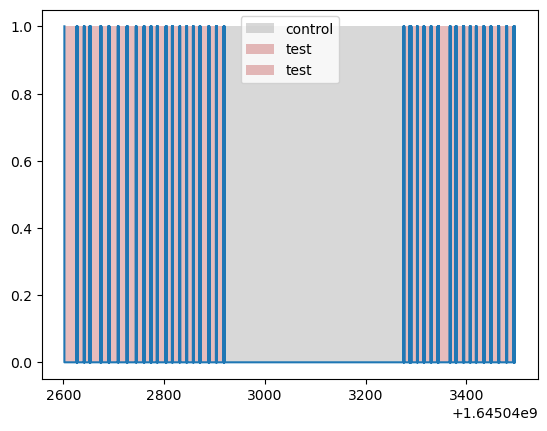

In [13]:
# key = {'nwb_file_name': "Banner20220224_.nwb", "interval_list_name":

print((OptoStimProtocol() & key).fetch1('inferred_params'))
print((OptoStimProtocol() & key).fetch1('control_intervals'))
print((OptoStimProtocol() & key).fetch1('test_intervals'))
# # OptoStimProtocol()
fig = OptoStimProtocol().validate_intervals(key)

In [32]:
interval = (sgc.IntervalList & key
           ).fetch1('valid_times')[0]
dio_info = sgc.DIOEvents() & {"nwb_file_name": key["nwb_file_name"],"dio_event_name": key["dio_event_name"]}
dio_data = dio_info.fetch_nwb()[0]["dio"]


[2023-06-23 15:19:09,893][WARNING]: Skipped checksum for file with hash: 5dccde87-d318-93fd-874d-a610279326fb, and path: /stelmo/nwb/raw/Winnie20220719_.nwb


In [1]:
import numpy as np
import matplotlib.pyplot as plt
time = dio_data.timestamps[:]
epoch_index = np.where((time >= interval[0]) & (time <= interval[1]))[0]
time = time[epoch_index]
print(interval[-1]-time[-1])
time = time-time[0]
data = dio_data.data[epoch_index]
plt.plot(time,data)
data[-1]
plt.xlim(0,10)

NameError: name 'dio_data' is not defined

In [9]:
OptoStimProtocolParams.drop()
# OptoStimProtocolSelection.drop()
# OptoStimProtocol.drop()
# (OptoStimProtocol() ).delete()

[2023-07-12 08:51:57,845][INFO]: `ms_opto_stim_protocol`.`opto_stim_protocol_params` (2 tuples)
INFO:datajoint:`ms_opto_stim_protocol`.`opto_stim_protocol_params` (2 tuples)
[2023-07-12 08:51:57,854][INFO]: `ms_opto_stim_protocol`.`opto_stim_protocol_selection` (445 tuples)
INFO:datajoint:`ms_opto_stim_protocol`.`opto_stim_protocol_selection` (445 tuples)
[2023-07-12 08:51:57,864][INFO]: `ms_opto_stim_protocol`.`__opto_stim_protocol` (444 tuples)
INFO:datajoint:`ms_opto_stim_protocol`.`__opto_stim_protocol` (444 tuples)


Proceed? [yes, No]:  yes


[2023-07-12 08:52:01,027][INFO]: Dropped table `ms_opto_stim_protocol`.`__opto_stim_protocol`
INFO:datajoint:Dropped table `ms_opto_stim_protocol`.`__opto_stim_protocol`
[2023-07-12 08:52:01,075][INFO]: Dropped table `ms_opto_stim_protocol`.`opto_stim_protocol_selection`
INFO:datajoint:Dropped table `ms_opto_stim_protocol`.`opto_stim_protocol_selection`
[2023-07-12 08:52:01,122][INFO]: Dropped table `ms_opto_stim_protocol`.`opto_stim_protocol_params`
INFO:datajoint:Dropped table `ms_opto_stim_protocol`.`opto_stim_protocol_params`
[2023-07-12 08:52:01,142][INFO]: Tables dropped. Restart kernel.
INFO:datajoint:Tables dropped. Restart kernel.


## Validate

### period_ms

In [10]:
set(OptoStimProtocol().fetch('period_ms'))

for key in OptoStimProtocol.fetch(as_dict=True):
    if key['period_ms'] not in [-1,50,80,90,100,125,165,250]:
        print(key)
        print(key['period_ms'])
        print('___')

{'nwb_file_name': 'Banner20220126_.nwb', 'interval_list_name': 'pos 7 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_pulse_train', 'optogenetic_protocol': 'pulse_train', 'pulse_length_ms': 3, 'inter_pulse_interval_ms': 5, 'inter_train_interval_ms': 54, 'period_ms': 86, 'pulses_per_train': 4, 'number_trains': 24.5547, 'stim_on': 1, 'test_intervals': [array([1.64325572e+09, 1.64325614e+09])], 'control_intervals': [array([1.64325614e+09, 1.64325626e+09])]}
86
___
{'nwb_file_name': 'Banner20220126_.nwb', 'interval_list_name': 'pos 8 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_pulse_train', 'optogenetic_protocol': 'pulse_train', 'pulse_length_ms': 27, 'inter_pulse_interval_ms': -1, 'inter_train_interval_ms': 84, 'period_ms': 111, 'pulses_per_train': 1, 'number_trains': 15.5128, 'stim_on': 1, 'test_intervals': [array([1.64325631e+09, 1.64325673e+09])], 'control_intervals': [array([1.64325673e+09, 1.64325688e+09])]}
111
___
{'nwb_file

In [11]:
key = (OptoStimProtocol &{'nwb_file_name': 'Bilbo20230725_.nwb', 'interval_list_name': 'pos 10 valid times',}).fetch(as_dict=True)[0]
key['period_ms'] = 125
OptoStimProtocol.update1(key)



{-1, 1, 2, 3, 5, 26, 27, 39, 40, 62}